In [76]:
# Copy this file and then run an experiment
# Import modules
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import importlib
import pickle  # Use this to save results so we don't need to rerun experiments
rf = importlib.import_module("random-forests")
misclass_rate = rf.random_forests.misclassification_rate
cmap = {"iris": "blue", "iris_sklearn": "purple", "heart": "red", "heart_sklearn": "orange"}
def comp_mean_sd(arr):
    return np.array([np.mean(arr), np.std(arr)])
def get_mean_sd(results):
    ret = {}
    for k in results.keys():
        ret[k] = np.apply_along_axis(comp_mean_sd, 1, results[k])
    return ret

In [77]:
# Load all datasets to use
iris = np.loadtxt("iris_csv.csv", dtype=str, delimiter=",")
heart = np.loadtxt("processed.cleveland.data", dtype=str, delimiter=",")


In [78]:
# Clean data
def str_in_arr(arr, str):
    return not np.isin(str, arr)
barr_heart = np.apply_along_axis(str_in_arr, 1, heart, "?")
heart = heart[barr_heart, :]
heart = heart.astype(float)

In [79]:
# Separate into data and labels
iris_data = iris[1:, :4].astype(float)
iris_labels = iris[1:, 4]

heart_data = heart[:, :-1]
heart_labels = heart[:, -1].astype(int)


# Turn heart_labels into array of 0, 1.
# 1 indicates presence of any type of heart disease, 0 indicates no presence
heart_labels_barr = heart_labels >= 1
heart_labels[heart_labels_barr] = 1

In [80]:
# Record the feature types
iris_ftype = "continuous"
heart_ftype = np.array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1])


In [81]:
# Set the seed so test train split it always the same for all tests
np.random.seed(1)
datasets = {"iris": (*train_test_split(iris_data, iris_labels, stratify=iris_labels), "continuous"),
            "heart": (*train_test_split(heart_data, heart_labels, stratify=heart_labels), heart_ftype),
            }

In [82]:
# Import sklearn random forests
from sklearn.ensemble import RandomForestClassifier

In [83]:
# Create an example plot for n_trees = 1-20 with error bars
ntrees = np.arange(1, 21)
# number of experiments to run for each parameter choice
nexp = 10
results = {}

In [84]:
dataset = "iris"
X_train, X_test, y_train, y_test, ftype = datasets[dataset]
result = np.empty((len(ntrees), nexp), dtype=float)
m_feats = int(np.floor(np.sqrt(X_train.shape[1])))
n_cand = 3*m_feats
np.random.seed(1)
for i, ntree in enumerate(ntrees):
    for j in range(nexp):
        random_forest = rf.RandomForest(n_trees=ntree, n_candidates=n_cand, max_depth=100)
        random_forest.fit(X_train, y_train, feature_type=ftype, m_features=m_feats)
        result[i, j] = misclass_rate(random_forest.predict(X_test), y_test)
results[dataset] = result

In [85]:
dataset = "iris"
X_train, X_test, y_train, y_test, ftype = datasets[dataset]
result = np.empty((len(ntrees), nexp), dtype=float)
m_feats = int(np.floor(np.sqrt(X_train.shape[1])))
n_cand = 3*m_feats
np.random.seed(1)
for i, ntree in enumerate(ntrees):
    for j in range(nexp):
        random_forest = RandomForestClassifier(n_estimators=ntree, max_depth=100)
        random_forest.fit(X_train, y_train)
        result[i, j] = misclass_rate(random_forest.predict(X_test), y_test)
results["iris_sklearn"] = result

In [86]:
dataset = "heart"
X_train, X_test, y_train, y_test, ftype = datasets[dataset]
result = np.empty((len(ntrees), nexp), dtype=float)
m_feats = int(np.floor(np.sqrt(X_train.shape[1])))
n_cand = 3*m_feats
np.random.seed(1)

for i, ntree in enumerate(ntrees):
    for j in range(nexp):
        random_forest = rf.RandomForest(n_trees=ntree, n_candidates=n_cand, max_depth=100)
        random_forest.fit(X_train, y_train, feature_type=ftype, m_features=m_feats)
        result[i, j] = misclass_rate(random_forest.predict(X_test), y_test)
results[dataset] = result



In [87]:
dataset = "heart"
X_train, X_test, y_train, y_test, ftype = datasets[dataset]
result = np.empty((len(ntrees), nexp), dtype=float)
m_feats = int(np.floor(np.sqrt(X_train.shape[1])))
n_cand = 3*m_feats
np.random.seed(1)

for i, ntree in enumerate(ntrees):
    for j in range(nexp):
        random_forest = RandomForestClassifier(n_estimators=ntree, max_depth=100)
        random_forest.fit(X_train, y_train)
        result[i, j] = misclass_rate(random_forest.predict(X_test), y_test)
results["heart_sklearn"] = result

In [91]:
import pickle
po = open("sklearn_comparison.pickle", "wb")
pickle.dump(results, po)
po.close()

In [88]:
mean_sd = get_mean_sd(results)

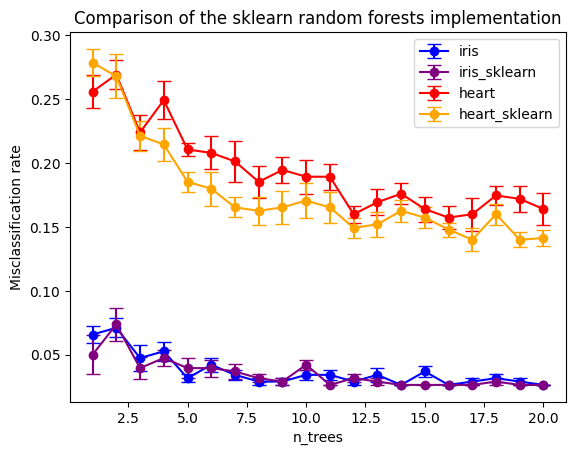

In [89]:
for dataset, m_sd in mean_sd.items():
    plt.errorbar(ntrees, m_sd[:, 0], yerr=m_sd[:, 1]/np.sqrt(nexp), label=dataset, capsize=5, fmt="o-", c=cmap[dataset])
plt.xlabel("n_trees")
plt.ylabel("Misclassification rate")
plt.title("Comparison of the sklearn random forests implementation")
plt.legend()